# Опорный пример для выполнения лабораторной работы по визуализации данных

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по обнаружению присутствия людей в помещении - https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Эта задача является очень актуальной для создания "умных зданий", 
которые выполняют все требования по кондиционированию воздуха, 
температурным условиям, но при этом экономят электроэнергию в том случае,
если людей в помещении нет.

Датасет состоит из трех файлов:
- datatraining.txt - обучающая выборка (в этом примере используется только данный файл)
- datatest.txt - тестовая выборка
- datatest2.txt - тестовая выборка большего размера

Каждый файл содержит следующие колонки:
- date - дата-время в формате ГОД-МЕСЯЦ-ДЕНЬ ЧАСЫ:МИНУТЫ:СЕКУНДЫ. Набор данных содержит данные с интервалом измерения в минуту.
- Temperature - температура в градусах Цельсия.
- Humidity - относительная влажность в %.
- Light - освещенность в Люксах.
- CO2 - концентрация углекислого газа в миллионных долях.
- HumidityRatio - величина, производная от температуры и относительной влажности.
- Occupancy - целевой признак. Если в помещении находятся люди то 1, иначе 0.

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('2014_ebola.csv', sep=",")

# 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,Country,Month,Year,Lat,Lon,Value
0,Guinea,3,14,9.95,-9.7,122
1,Guinea,4,14,9.95,-9.7,224
2,Guinea,5,14,9.95,-9.7,291
3,Guinea,6,14,9.95,-9.7,413
4,Guinea,7,14,9.95,-9.7,460


In [4]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(31, 6)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 31


In [6]:
# Список колонок
data.columns

Index(['Country', 'Month', 'Year', 'Lat', 'Lon', 'Value'], dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

Country     object
Month        int64
Year         int64
Lat        float64
Lon        float64
Value        int64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Country - 0
Month - 0
Year - 0
Lat - 0
Lon - 0
Value - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Month,Year,Lat,Lon,Value
count,31.00000,31.0,31.000000,31.000000,31.000000
mean,8.16129,14.0,9.328710,-10.097097,991.741935
std,2.59611,0.0,3.026781,2.163978,1103.731005
min,3.00000,14.0,6.430000,-14.450000,1.000000
25%,6.00000,14.0,6.430000,-11.780000,114.500000
50%,8.00000,14.0,8.460000,-9.700000,533.000000
75%,10.00000,14.0,9.950000,-9.430000,1625.500000
max,12.00000,14.0,17.570000,-4.000000,3567.000000


In [10]:
# Определим уникальные значения для целевого признака
data['Month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Целевой признак является бинарным и содержит только значения 0 и 1.

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

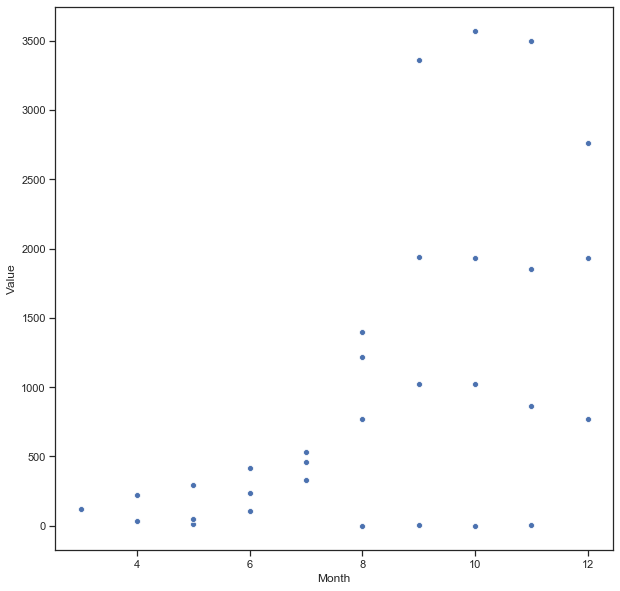

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Month', y='Value', data=data)

Можно видеть что между полями Humidity и HumidityRatio пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

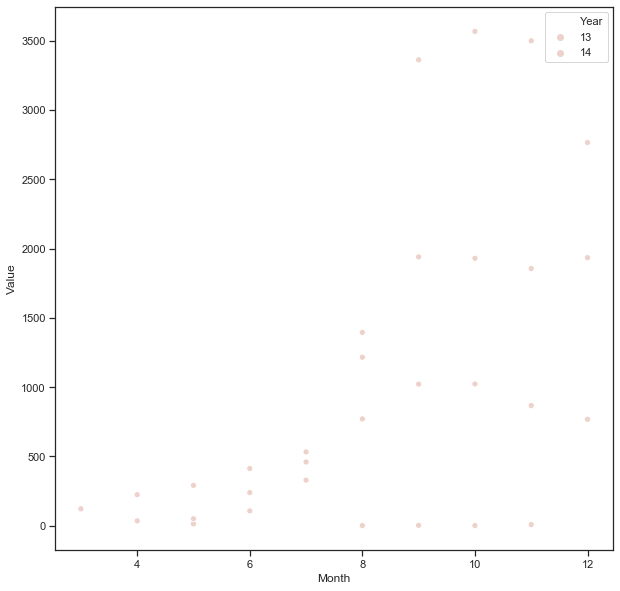

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Month', y='Value', data=data, hue='Year')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

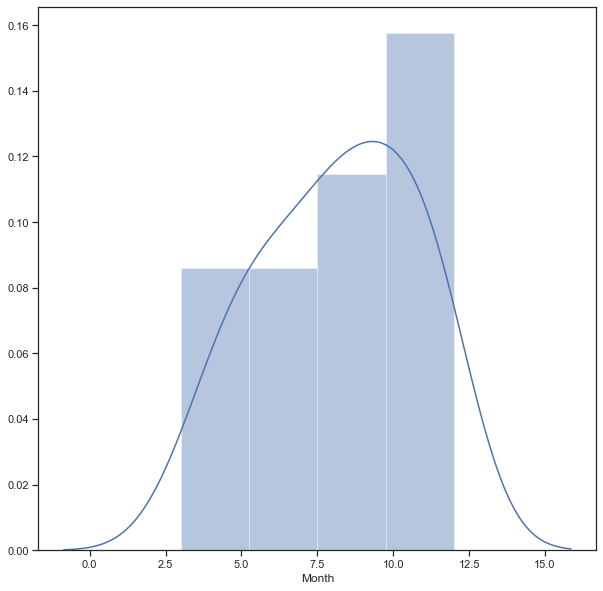

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Month'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

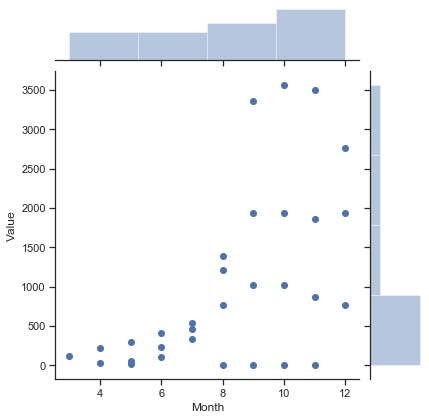

In [14]:
sns.jointplot(x='Month', y='Value', data=data)

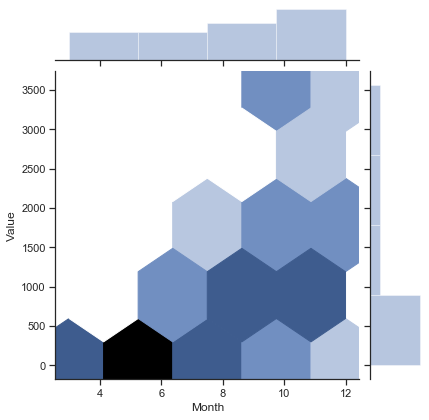

In [15]:
sns.jointplot(x='Month', y='Value', data=data, kind="hex")

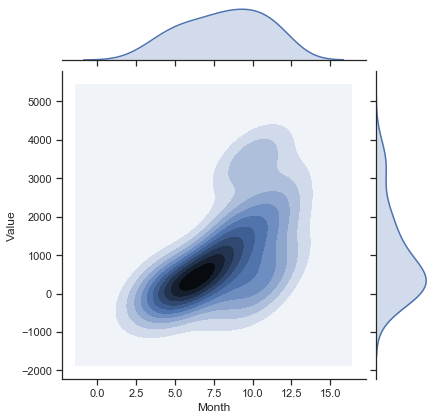

In [16]:
sns.jointplot(x='Month', y='Value', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

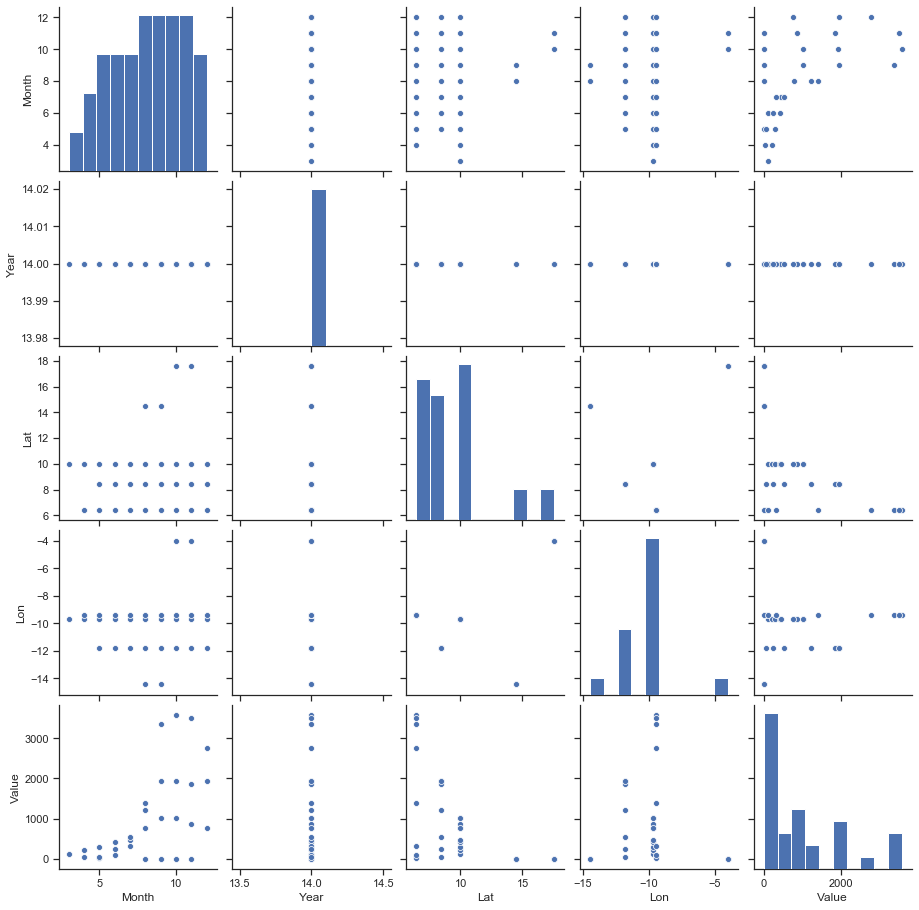

In [17]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

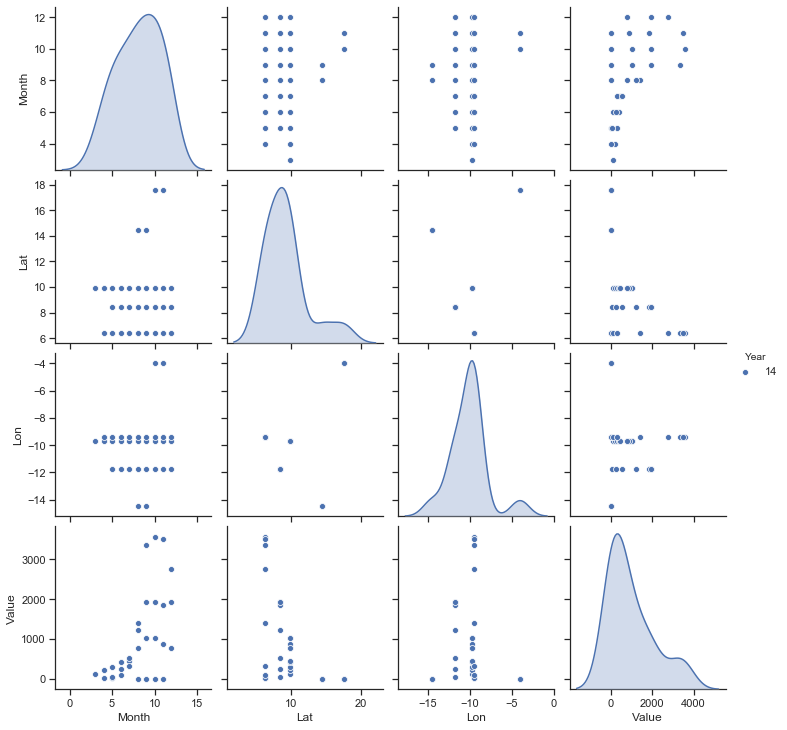

In [18]:
sns.pairplot(data, hue="Year")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

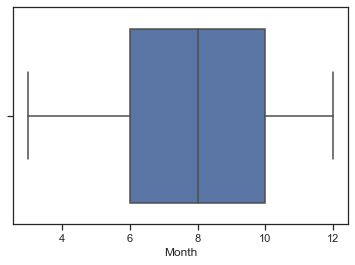

In [19]:
sns.boxplot(x=data['Month'])

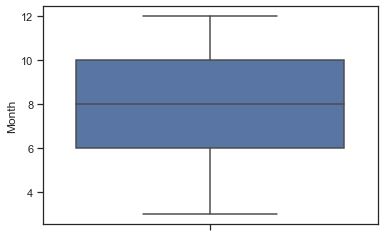

In [20]:
# По вертикали
sns.boxplot(y=data['Month'])

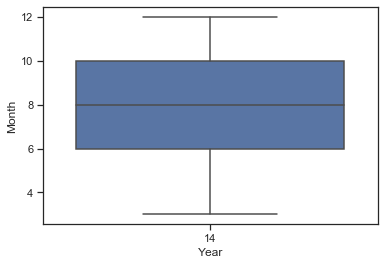

In [21]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Year', y='Month', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

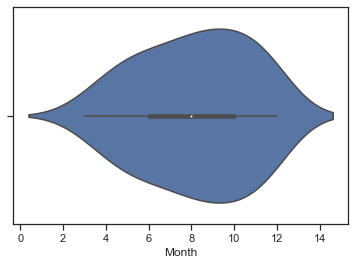

In [22]:
sns.violinplot(x=data['Month'])

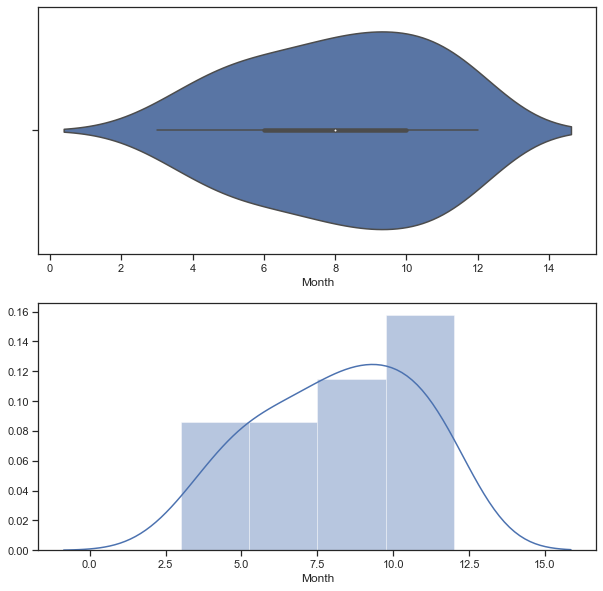

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Month'])
sns.distplot(data['Month'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

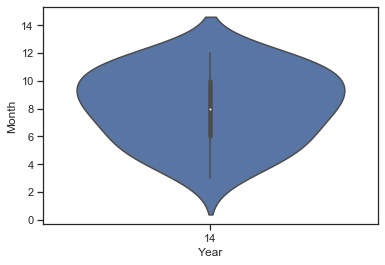

In [24]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Year', y='Month', data=data)

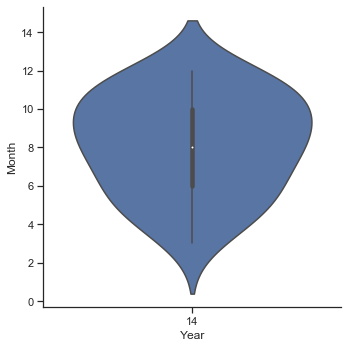

In [25]:
sns.catplot(y='Month', x='Year', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [26]:
data.corr()

,Month,Year,Lat,Lon,Value
Month,1.000000,NaN,0.168818,0.103333,0.574907
Year,NaN,NaN,NaN,NaN,NaN
Lat,0.168818,NaN,1.000000,0.265831,-0.482084
Lon,0.103333,NaN,0.265831,1.000000,-0.053895
Value,0.574907,NaN,-0.482084,-0.053895,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с освещенностью (0.9) и концентрацией углекислого газа (0.71). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с температурой (0.54). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с влажностью (0.13) и HumidityRatio (0.3). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- Влажность и HumidityRatio очень сильно коррелируют между собой (0.96). Это неудивительно, ведь HumidityRatio величина производная от влажности. Поэтому из этих признаков в модели можно оставлять только один. 
- Также можно сделать вывод, что выбирая из признаков влажность и HumidityRatio лучше выбрать HumidityRatio, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.13 и 0.3 являются довольно малыми величинами. 

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [27]:
data.corr(method='pearson')

,Month,Year,Lat,Lon,Value
Month,1.000000,NaN,0.168818,0.103333,0.574907
Year,NaN,NaN,NaN,NaN,NaN
Lat,0.168818,NaN,1.000000,0.265831,-0.482084
Lon,0.103333,NaN,0.265831,1.000000,-0.053895
Value,0.574907,NaN,-0.482084,-0.053895,1.000000


In [28]:
data.corr(method='kendall')

,Month,Year,Lat,Lon,Value
Month,1.000000,NaN,0.059089,0.033398,0.428600
Year,NaN,1.0,NaN,NaN,NaN
Lat,0.059089,NaN,1.000000,-0.220339,-0.402186
Lon,0.033398,NaN,-0.220339,1.000000,-0.027141
Value,0.428600,NaN,-0.402186,-0.027141,1.000000


In [29]:
data.corr(method='spearman')

,Month,Year,Lat,Lon,Value
Month,1.000000,NaN,0.070097,0.049226,0.533166
Year,NaN,NaN,NaN,NaN,NaN
Lat,0.070097,NaN,1.000000,-0.294400,-0.484025
Lon,0.049226,NaN,-0.294400,1.000000,-0.002935
Value,0.533166,NaN,-0.484025,-0.002935,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

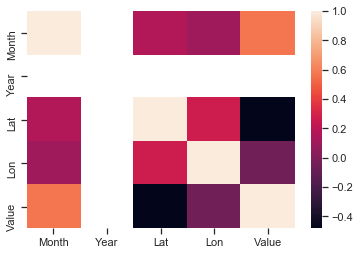

In [30]:
sns.heatmap(data.corr())

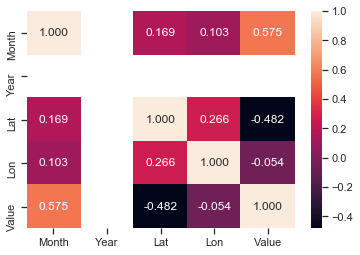

In [31]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

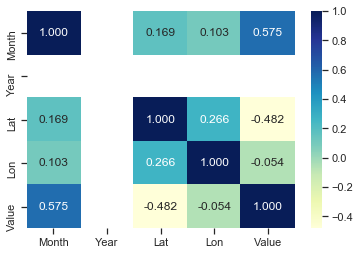

In [32]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

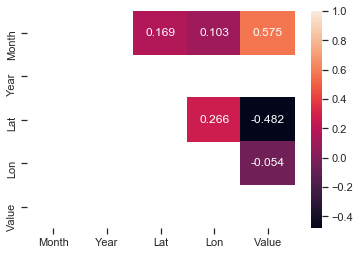

In [33]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

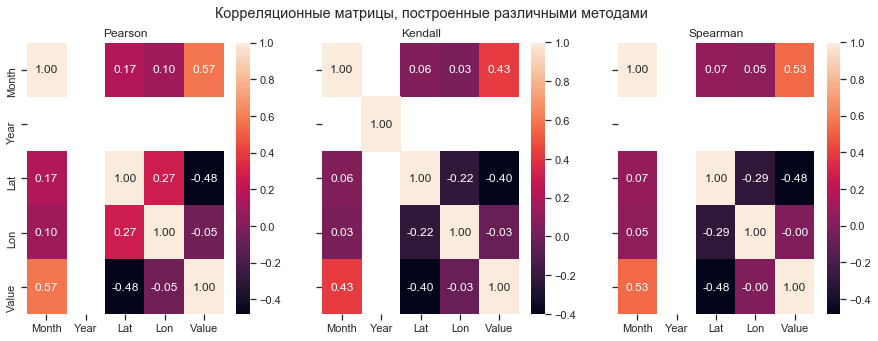

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)